# Credit Card Fraud Detection Project

* Problem: Determine whether a credit card transaction is fraudulent
* Solution: Using machine learning, a model will be created by finding patterns in a a sample set of credit card transaction data to determine whether a transaction is fraudulent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDClassifier
import pickle

%matplotlib inline

plt.style.use('seaborn-whitegrid')

# Workflow:
1. Prepare Data: import, create dataframe, perform data wrangling for any missing data
2. Exploratory Data Analysis (Descriptive Method): Using visualization library like matplotlib
3. Choose the correct estimator/algorithm for the problem and dataset.
4. Create a test and train splits the feature variables and target variable
5. Fit the test on the selected model
6. Evaluate model
7. Tune model by changing model hyper parameters
8. Save and load the trained model
9. Use model to predict whether a credit card transaction is fraudulent

## Table View of the Sample Dataset

In [33]:
# import data and create dataframe
sample_data = pd.read_csv("data/card_transaction_data.csv")
sample_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [36]:
sample_data_stats = pd.DataFrame(sample_data[['distance_from_home', 
                                             'distance_from_last_transaction', 
                                             'ratio_to_median_purchase_price']].describe())
sample_data_stats.style.set_caption("Descriptive Statistics of Sample Dataset's Numerical Data")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


In [5]:
# Setting variables

count_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 1.0].count()['repeat_retailer']
count_non_repeat_retailer = sample_data[sample_data['repeat_retailer'] == 0.0].count()['repeat_retailer']
count_repeat_retailer, count_non_repeat_retailer, count_non_repeat_retailer + count_repeat_retailer

repeat_retailer = {
    "Repeat": count_repeat_retailer,
    "Non-Repeat": count_non_repeat_retailer
}

count_used_chip = sample_data[sample_data['used_chip'] == 1.0].count()['used_chip']
count_no_chip = sample_data[sample_data['used_chip'] == 0.0].count()['used_chip']

used_chip = {
    "Used Chip": count_used_chip,
    "Did Not Use Chip": count_no_chip
}

labels = 'Used Pin', 'Did Not Use Pin'
explode = (0, 0.1)

count_used_pin = sample_data[sample_data['used_pin_number'] == 1.0].count()['used_pin_number']
count_no_pin = sample_data[sample_data['used_pin_number'] == 0.0].count()['used_pin_number']

sizes = [count_used_pin, count_no_pin]

used_pin = {
    "Used Pin": count_used_pin,
    "Did Not Use Pin": count_no_pin
}


labels_online_order = 'Online Order', 'Not Online Order'
explode_online_order = (0, 0.1)

count_online_order = sample_data[sample_data['online_order'] == 1.0].count()['online_order']
count_not_oneline_order = sample_data[sample_data['online_order'] == 0.0].count()['online_order']

sizes_online_order = [count_online_order, count_not_oneline_order]

## Data Visualizations - Descriptive Methods

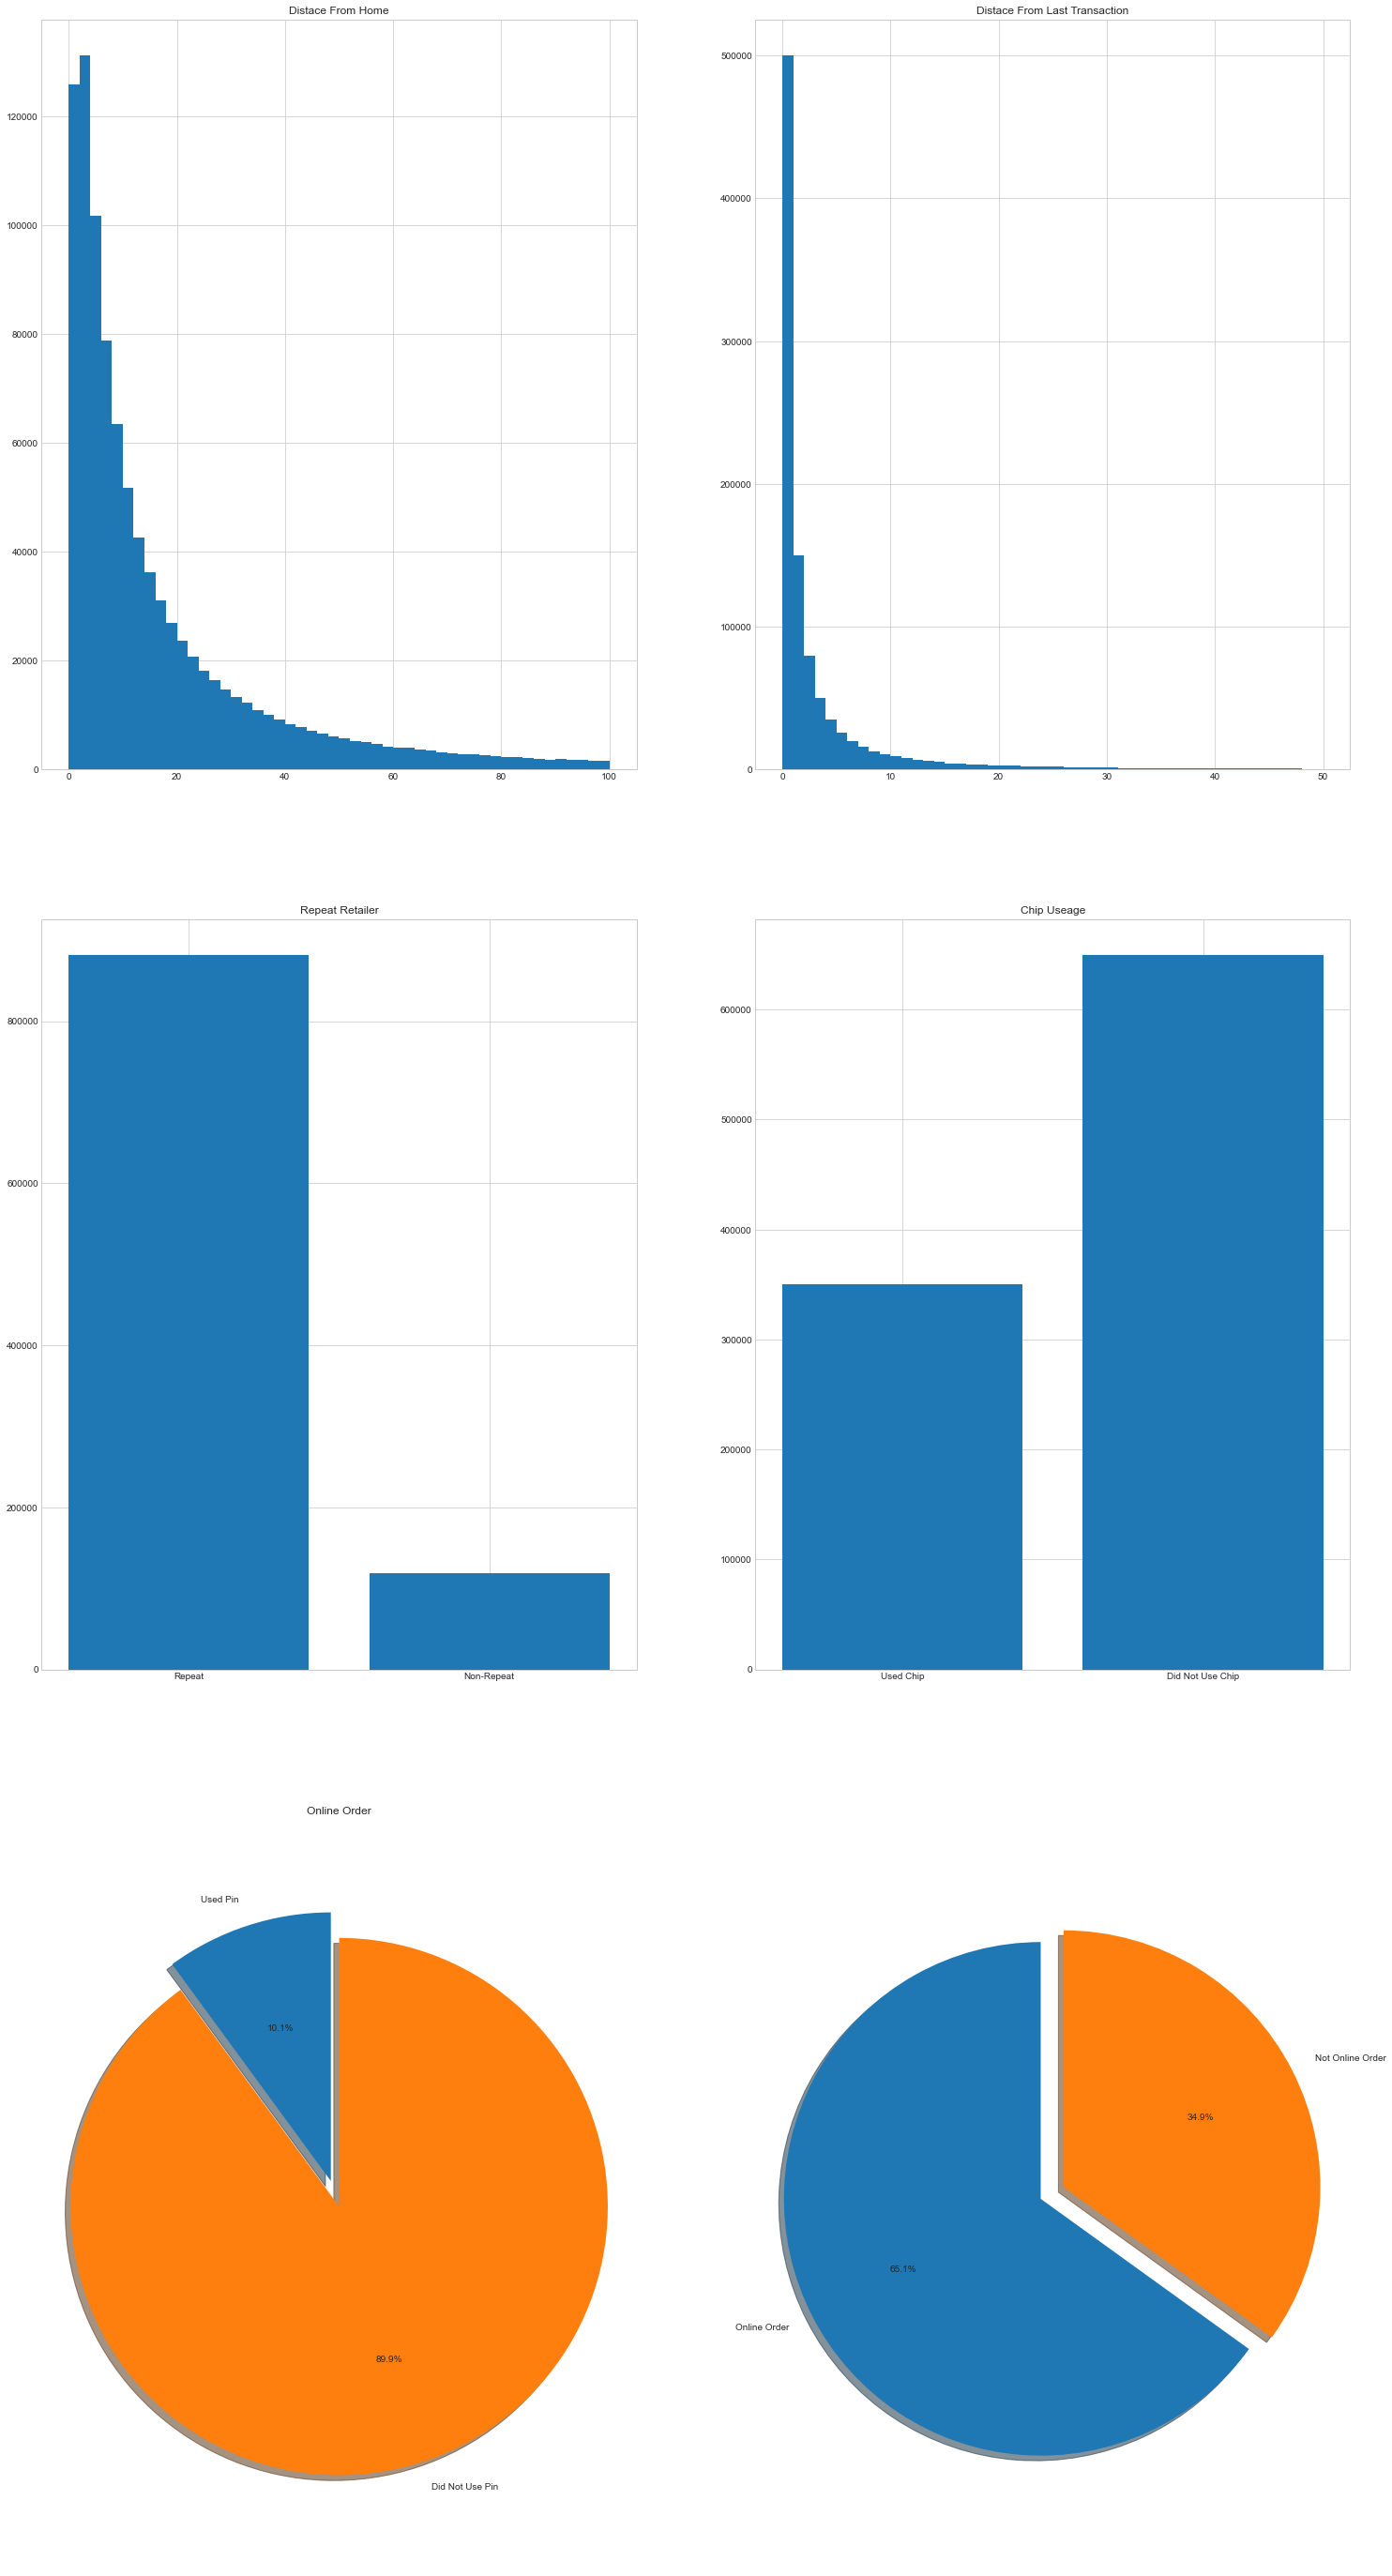

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(25,50))

#ax1 will show a histogram of distribution of the transactions' distance from home
ax1.hist(sample_data['distance_from_home'], bins=50, range=(0,100))
ax1.set(title="Distace From Home")

ax2.hist(sample_data['distance_from_last_transaction'], bins=50, range=(0,50))
ax2.set(title="Distace From Last Transaction")

ax3.bar(repeat_retailer.keys(), repeat_retailer.values())
ax3.set(title="Repeat Retailer")

ax4.bar(used_chip.keys(), used_chip.values())
ax4.set(title="Chip Useage")

ax5.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax5.axis('equal')
ax5.set(title="Used Pin")

ax6.pie(sizes_online_order, explode=explode_online_order, labels=labels_online_order, shadow=True, startangle=90, autopct='%1.1f%%')
ax6.axis('equal')
ax6.set(title="Online Order")

plt.plot(color="mediumvioletred")
plt.show()

In [7]:
# create test train data sample split
np.random.seed(95)

X = sample_data.drop('fraud', axis=1)
y = sample_data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [20]:
# import model and fit
model = SGDClassifier(loss="hinge")
model.fit(X_train, y_train)

# store predictions in the variable
y_preds = model.predict(X_test)

# model.score(X_test, y_test)

0.961095

### These values indicate the model's performance scores

In [23]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print(f"Mean Error: {mean_absolute_error(y_test, y_preds)} , Accuracy Score: {accuracy_score(y_test, y_preds)}")

Mean Error: 0.03932375 , Accuracy Score: 0.96067625


### This is a sample data set that a user can input and use on the model to determine whether the entered transaction details results in a legitimate or fraudulent transaction

In [19]:
# Hold feature names in variable
feature_names = X.columns

# Testing the model with user inputted data set.
trasac_1 = pd.DataFrame(data=([[500, 250, 1.25, 1.0, 1.0, 1.0, 0.0]]), columns=feature_names)

# print the results
result = model.predict(trasac_1)
if (result[0] == 0.0):
    print("The model indicates that the transaction is legitimate!")
else:
    print("The model indicates that the transaction is fradulent!")


The model indicates that the transaction is legitimate!
